<a href="https://colab.research.google.com/github/liminal-learner/cancer_detection/blob/master/notebooks/3_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deploy

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
% tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files
from tensorflow import keras
import numpy as np

In [2]:
# To import src for this project into colab: 
ROOT_DIR = '/content'
os.chdir(ROOT_DIR)
!rm -rf cancer_detection
! ls -l | head -10

!git clone https://github.com/liminal-learner/cancer_detection.git

PROJ_ROOT = os.path.join(ROOT_DIR, 'cancer_detection')

os.sys.path.append(PROJ_ROOT)

total 4
drwxr-xr-x 1 root root 4096 Nov  6 16:17 sample_data
Cloning into 'cancer_detection'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 240 (delta 43), reused 18 (delta 5), pack-reused 137
Receiving objects: 100% (240/240), 62.66 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [3]:
src_dir = os.path.join(PROJ_ROOT, "src")
os.sys.path.append(src_dir)

from data.DataGenerator import DataGenerator
from model.ModelContainer import ModelContainer

Using TensorFlow backend.


### Define parameters & download the data from Kaggle:

In [4]:
# Use this to upload the kaggle.json from your local machine:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
! ls -l | head -10

total 12
drwxr-xr-x 6 root root 4096 Nov  9 16:44 cancer_detection
-rw-r--r-- 1 root root   64 Nov  9 16:44 kaggle.json
drwxr-xr-x 1 root root 4096 Nov  6 16:17 sample_data


In [7]:
!cp kaggle.json '/root/.kaggle/'
!chmod 600 '/root/.kaggle/kaggle.json'
!kaggle config set -n path -v '/content/'
!kaggle competitions download histopathologic-cancer-detection

- path is now set to: /content/
  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 90.9MB/s]
 98% 5.00M/5.10M [00:00<00:00, 30.3MB/s]
100% 5.10M/5.10M [00:00<00:00, 24.7MB/s]
100% 1.30G/1.30G [01:17<00:00, 28.9MB/s]
100% 1.30G/1.30G [01:17<00:00, 18.2MB/s]
100% 4.98G/4.98G [04:41<00:00, 27.9MB/s]
100% 4.98G/4.98G [04:41<00:00, 19.0MB/s]


In [0]:
DATA_DIR = os.path.join(ROOT_DIR, 'competitions/histopathologic-cancer-detection/')
train_path = os.path.join(DATA_DIR, 'train/')
test_path = os.path.join(DATA_DIR, 'test/')
train_labels_path = os.path.join(DATA_DIR, 'train_labels.csv/train_labels.csv')

unique_identifier = 'id'
target_class_column = 'label'
image_size = (96, 96)
n_channels = 3
validation_frac = 0.2

In [0]:
# Unzip files in all zipped directories:
os.chdir(DATA_DIR)

for path_to_zip_file in os.listdir():
    new_directory = os.path.splitext(path_to_zip_file)[0]
    os.makedirs(new_directory, exist_ok = True)
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
      zip_ref.extractall(new_directory)
      zip_ref.close()

In [10]:
os.chdir(DATA_DIR)
! ls -l | head -10

total 6617072
drwxr-xr-x 2 root root       4096 Nov  9 16:54 sample_submission.csv
-rw-r--r-- 1 root root    1394488 Nov  9 16:45 sample_submission.csv.zip
drwxr-xr-x 2 root root    4378624 Nov  9 16:54 test
-rw-r--r-- 1 root root 1401100547 Nov  9 16:46 test.zip
drwxr-xr-x 2 root root   16666624 Nov  9 16:54 train
drwxr-xr-x 2 root root       4096 Nov  9 16:54 train_labels.csv
-rw-r--r-- 1 root root    5352900 Nov  9 16:45 train_labels.csv.zip
-rw-r--r-- 1 root root 5346961539 Nov  9 16:51 train.zip


### Prepare the data & load the model:

In [11]:
data = DataGenerator(train_path, train_labels_path, test_path, unique_identifier, image_size, n_channels, target_class_column, validation_frac)

Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.
Found 57458 validated image filenames.


In [12]:
models = ModelContainer()

os.chdir(PROJ_ROOT)
models.load_model(os.path.join('models','baseline.h5'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Score the test set:


In [0]:
models.make_predictions('baseline', data.test_generator)

57458/57458 [==============================] - 171s 3ms/step


## Submit to Kaggle:

In [0]:
# Predictions were made in the order of the test_df using the test generator:
submission = data.test_df
submission['label'] = models.predictions
# Take out the extension for the submission:
submission['id'] = submission['id'].apply(lambda x: x.split(".")[0])

submission.to_csv("submission.csv", index = False, header = True)


In [0]:
submission.head()

,id,label
0,f57e0469a2627e63cf87c71acba7f4b82796f85a,0.192206
1,230c6b79f156c23b0642d0856263879b293daf8e,0.065030
2,6126f9be3558f75cb8de32d67de5856f7e6dd753,0.733952
3,1a2d90bc7b16165e72551d25995f5b8d08828144,0.871041
4,be7e1682edfc32bb84e17083f4b775eda91ef07f,0.045973


In [0]:
files.download("submission.csv")

In [0]:
!kaggle competitions submit -c histopathologic-cancer-detection -f submission.csv -m "Message"

100% 2.84M/2.84M [00:07<00:00, 412kB/s]
Successfully submitted to Histopathologic Cancer Detection

This gave me a score of 0.9014 on Kaggle.

## Feature map analysis:

In [14]:
for im in data.test_generator:
    img_tensor = im
    break # Just want one image

img_tensor.shape

(1, 96, 96, 3)

In [16]:
model = models.models['baseline']
model.summary()

Model: "baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 64)        9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 256)       590

In [0]:

# Have to compile this in order to use it to make an activation model:
model.compile(loss = model.loss, optimizer = model.optimizer, metrics = model.metrics)

# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in model.layers[:8]] 

# Creates a model that will return these outputs, given the model input
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs) 


In [17]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 64)        9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       295168

In [0]:
# Returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in model.layers:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

In [0]:
def get_activations(layer, img_tensor):
  for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps

The code to visualize the activations for a particular image below is from [Gabriel Pierobon](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0):

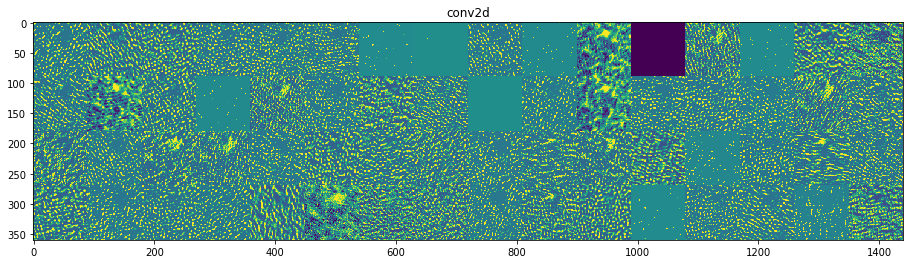

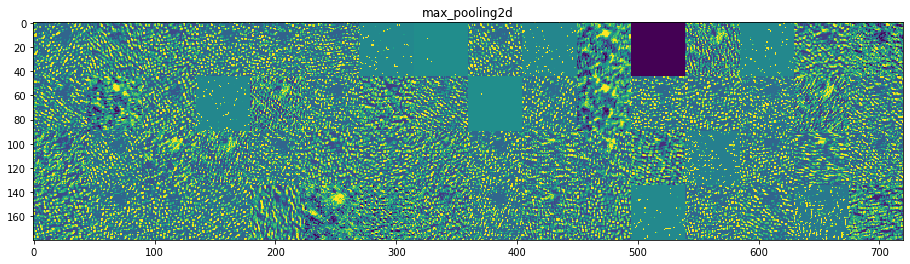

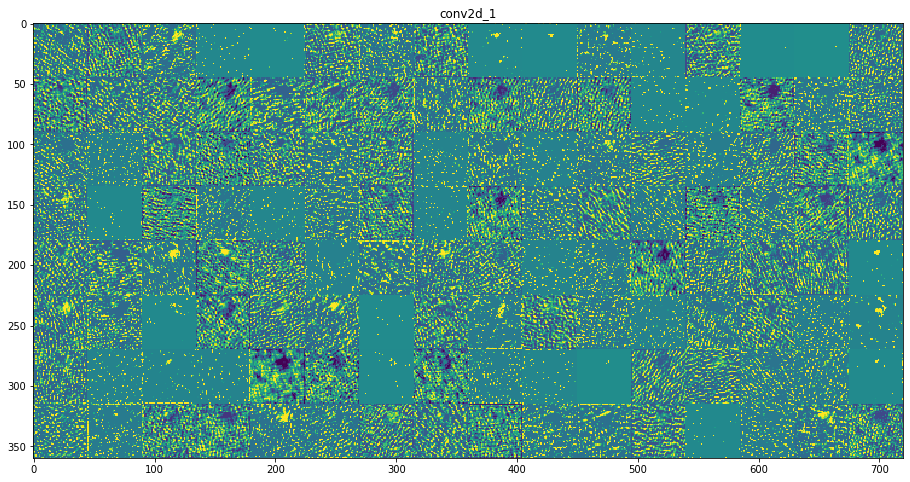

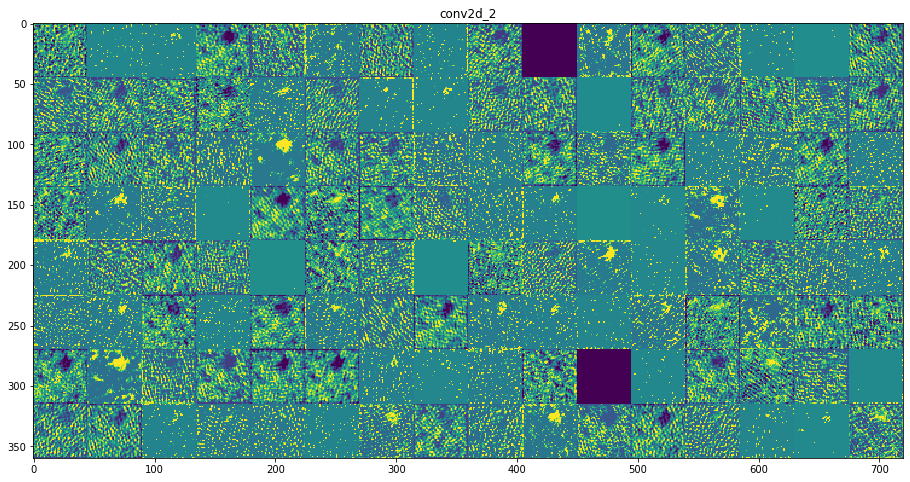

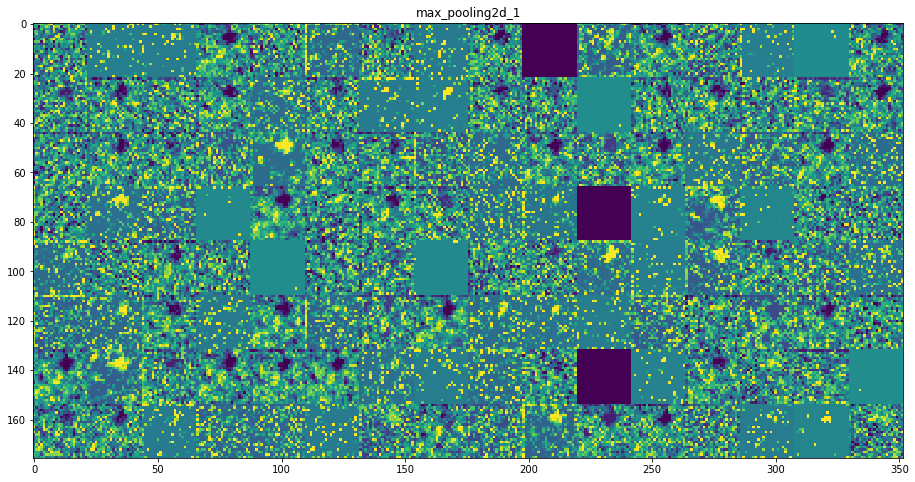

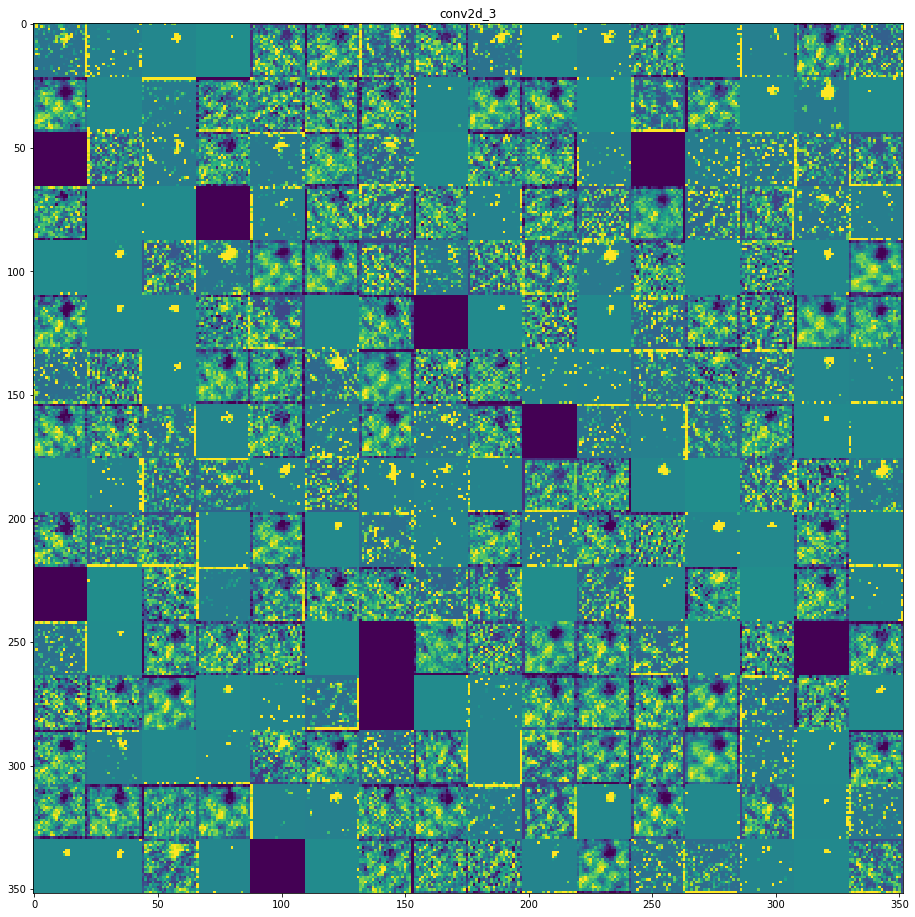

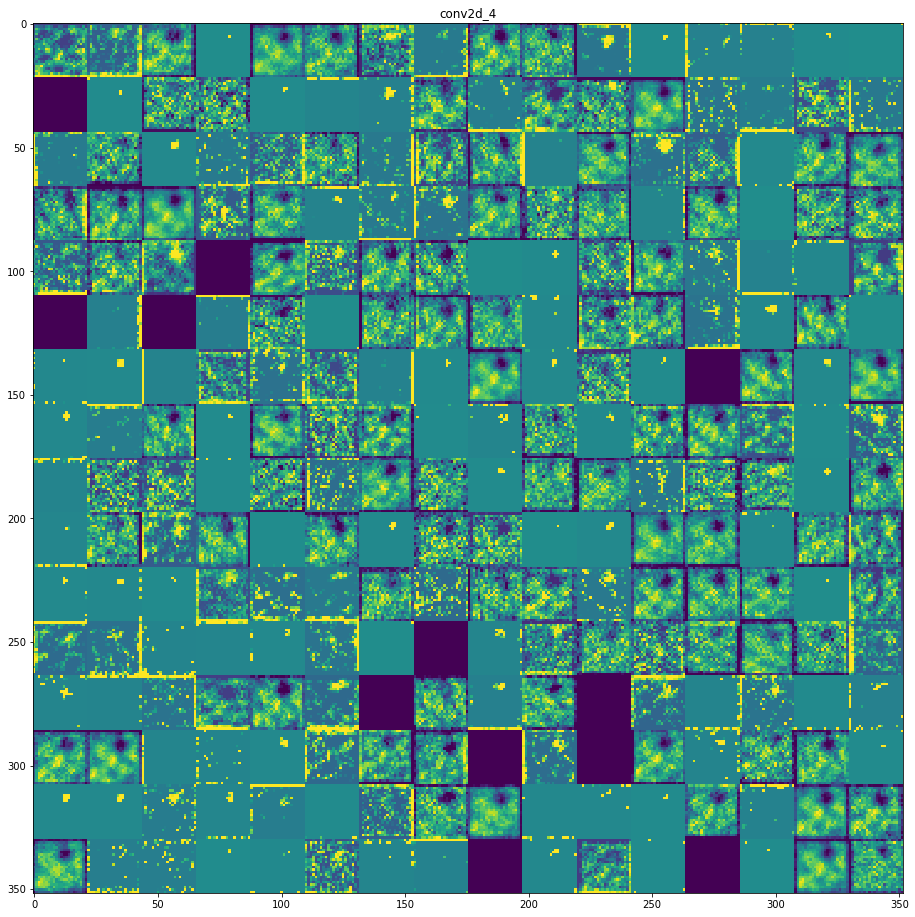

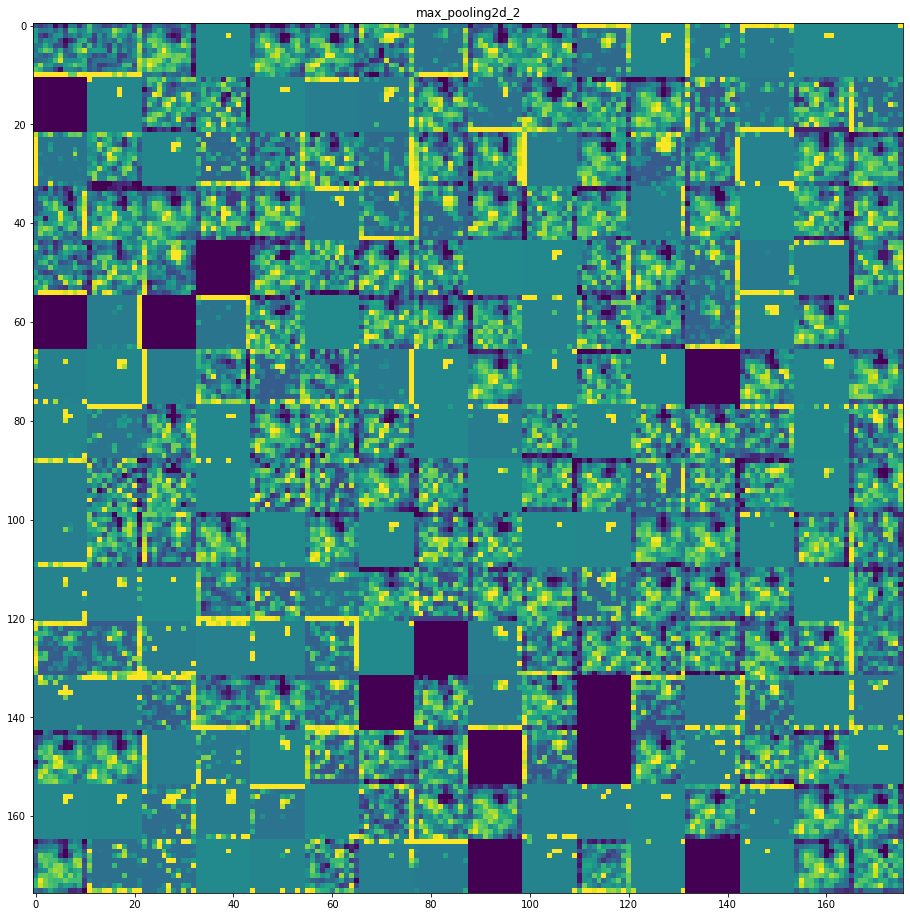

In [27]:
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='equal')#, cmap='viridis')

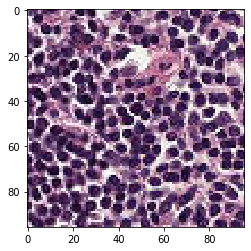

In [26]:
plt.imshow(img_tensor[0,:,:,:], aspect='equal')

In [0]:
class SaveFeatures():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = torch.tensor(output,requires_grad=True).cuda()
    def close(self):
        self.hook.remove()

class FilterVisualizer():
    def __init__(self, size=56, upscaling_steps=12, upscaling_factor=1.2):
        self.size, self.upscaling_steps, self.upscaling_factor = size, upscaling_steps, upscaling_factor
        self.model = vgg16(pre=True).cuda().eval()
        set_trainable(self.model, False)

    def visualize(self, layer, filter, lr=0.1, opt_steps=20, blur=None):
        sz = self.size
        img = np.uint8(np.random.uniform(150, 180, (sz, sz, 3)))/255  # generate random image
        activations = # SaveFeatures(list(self.model.children())[layer])  # register hook

        for _ in range(self.upscaling_steps):  # scale the image up upscaling_steps times
            train_tfms, val_tfms = tfms_from_model(vgg16, sz)
            img_var = V(val_tfms(img)[None], requires_grad=True)  # convert image to Variable that requires grad
            optimizer = torch.optim.Adam([img_var], lr=lr, weight_decay=1e-6)
            for n in range(opt_steps):  # optimize pixel values for opt_steps times
                optimizer.zero_grad()
                self.model(img_var)
                loss = -activations.features[0, filter].mean()
                loss.backward()
                optimizer.step()
            img = val_tfms.denorm(img_var.data.cpu().numpy()[0].transpose(1,2,0))
            self.output = img
            sz = int(self.upscaling_factor * sz)  # calculate new image size
            img = cv2.resize(img, (sz, sz), interpolation = cv2.INTER_CUBIC)  # scale image up
            if blur is not None: img = cv2.blur(img,(blur,blur))  # blur image to reduce high frequency patterns
        self.save(layer, filter)
        activations.close()
        
    def save(self, layer, filter):
        plt.imsave("layer_"+str(layer)+"_filter_"+str(filter)+".jpg", np.clip(self.output, 0, 1))


The first layer is arguably retaining the full shape of the triangle, although there are several filters that are not activated and are left blank. At that stage, the activations retain almost all of the information present in the initial picture.
As we go deeper in the layers, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as single borders, corners and angles. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
As mentioned above, the model stucture is overly complex to the point where we can see our last layers actually not activating at all, there’s nothing more to learn at that point.

In [14]:
baseline_model.input

<tf.Tensor 'conv2d_7_input:0' shape=(?, 96, 96, 3) dtype=float32>

In [0]:
classifier.input

<tf.Tensor 'conv2d_2_input:0' shape=(?, 28, 28, 3) dtype=float32>

In [19]:
models = ModelContainer()

os.chdir(PROJ_ROOT)
models.load_model(os.path.join('models','baseline.h5'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
layer_outputs = [layer.output for layer in models.models['baseline'].layers[:8]] 
# Extracts the outputs of the top 12 layers
activation_model = kmodels.Model(inputs=models.models['baseline'].input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

TypeError: ignored